# Efficient Neuroevolution of Sparse Recurrent Neural Networks
Author: Jin Yeom (jinyeom@utexas.edu)

In this notebook, we're going to investigate an efficient Neuroevolution method for recurrent neural networks. This method is inspired from an algorithm called NEAT (**N**euro**E**volution of **A**ugmenting **T**opologies), in which a population of initially minimal neural networks are complexified by adding nodes and connections, throughout the evolution process. While NEAT is effective in many domains, I have decided that the algorithm is too complicated. 

Let's consider a following recurrent neural network,

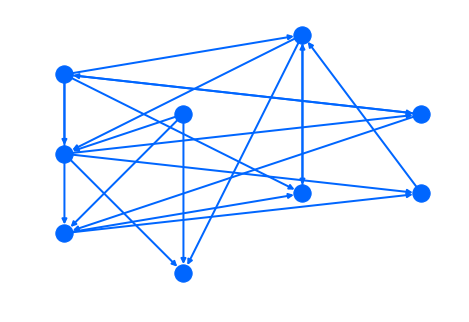

In [25]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline

G = nx.DiGraph()
G.add_nodes_from([0, 1, 2], ntype="input") # input neurons
G.add_nodes_from([3, 4, 5, 6], ntype="hidden") # hidden neurons
G.add_nodes_from([7, 8], ntype="output") # output neurons
for i in range(24):
    src = np.random.choice(9)
    dst = np.random.choice(9)
    weight = np.random.normal(loc=0.0, scale=0.1)
    G.add_edge(src, dst, weight=weight)

# positions of neurons.
pos = {0: (10, 10), 1: (10, 20), 2: (10, 30),
       3: (20, 5), 4: (30, 15), 5: (20, 25), 6: (30, 35),
       7: (40, 15), 8: (40, 25)}
    
nx.draw(G, pos=pos, node_color="#0066FF", width=2, edge_color="#0066FF")
plt.draw()

Because our neural network is represented with a directed graph, it can also be represented with a sparse matrix:

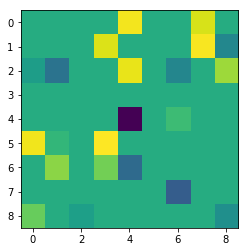

In [26]:
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

weights = nx.get_edge_attributes(G, "weight")
row = [src for (src, dst), w in weights.items()]
col = [dst for (src, dst), w in weights.items()]
data = [w for (src, dst), w in weights.items()]
W = coo_matrix((data, (row, col)), shape=(9, 9))
W = W.tocsr() # CSR format is faster for matrix vector multiplication

plt.imshow(W.toarray())